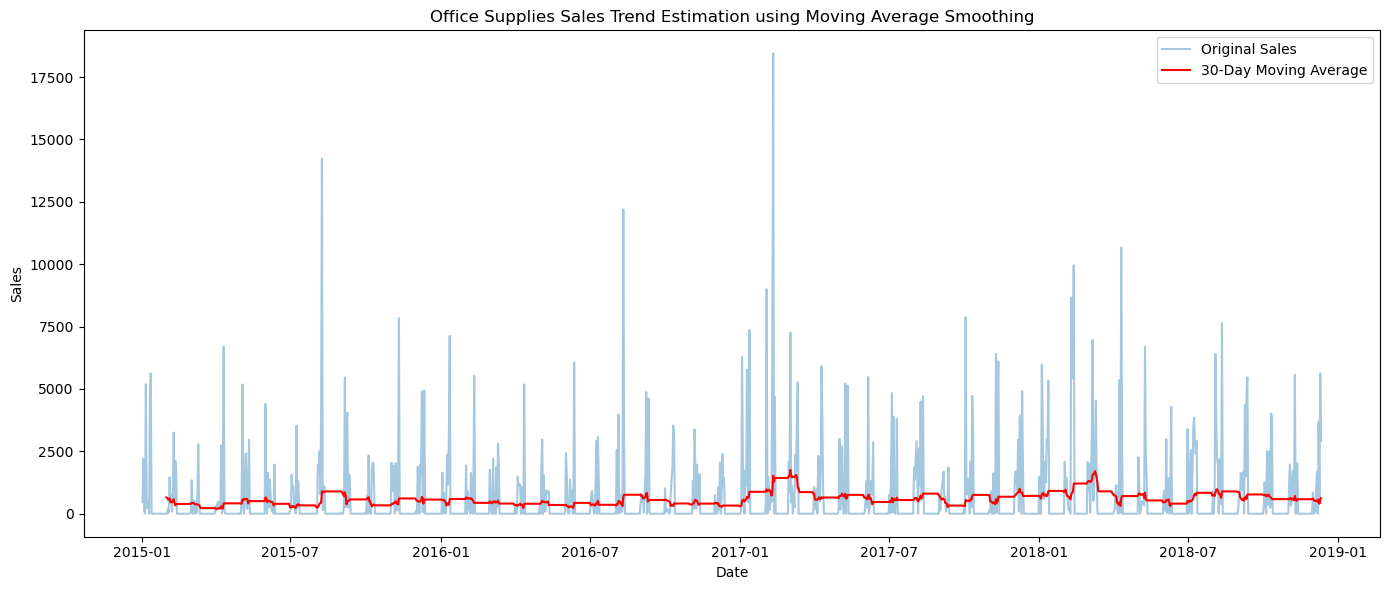

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the cleaned sales dataset
df = pd.read_csv("cleaned_sales_data.csv")

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Set 'Order Date' as the index
df.set_index('Order Date', inplace=True)

# Create a daily aggregated sales series
df_daily = df['Sales'].resample('D').sum()

# Apply Moving Average Smoothing
window_size = 30  # 30-day moving average
df_smooth = df_daily.to_frame(name='Sales')
df_smooth['Moving_Avg'] = df_smooth['Sales'].rolling(window=window_size).mean()


# Plot the original and smoothed time series
plt.figure(figsize=(14, 6))
plt.plot(df_smooth['Sales'], label='Original Sales', alpha=0.4)
plt.plot(df_smooth['Moving_Avg'], label=f'{window_size}-Day Moving Average', color='red')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Office Supplies Sales Trend Estimation using Moving Average Smoothing")
plt.legend()
plt.tight_layout()
plt.show()
